In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

In [20]:
df = pd.read_excel('RJ_Reconstrucao_Moluscos_2024_06_06.xlsx')
print(df.head())

    Ano  Lula_art  Lula_ind  Lula_art_ind  Lula_oceanica_art  Calamar_ind  \
0  1950       NaN       NaN           NaN                NaN          NaN   
1  1951       NaN       NaN           NaN                NaN          NaN   
2  1952       NaN       NaN           NaN                NaN          NaN   
3  1953       NaN       NaN           NaN                NaN          NaN   
4  1954       NaN       NaN           NaN                NaN          NaN   

   Polvo_art  Polvo_ind  Polvo_art_ind  Polvo_cabecinha_art  ...  \
0        NaN        NaN            NaN                  NaN  ...   
1        NaN        NaN            NaN                  NaN  ...   
2        NaN        NaN            NaN                  NaN  ...   
3        NaN        NaN            NaN                  NaN  ...   
4        NaN        NaN            NaN                  NaN  ...   

   Mexilhao_art  Mexilhao_ind  Mexilhao_mangue_art  Caramujo_art  \
0           NaN           NaN                  NaN          

In [21]:
x0 = df[['Ano', 'Polvo_art']].dropna().values
x1 = df[['Ano', 'Polvo_ind']].dropna().values


In [22]:
df_x0= pd.DataFrame(x0, columns= ['Ano', 'Polvo_art'])
df_x1=pd.DataFrame(x1, columns= ['Ano', 'Polvo_ind'])
df_x0= df_x0.drop_duplicates(subset= 'Polvo_art')
df_x1= df_x1.drop_duplicates(subset='Polvo_ind')

In [23]:
x = np.array(df_x0['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x0['Polvo_art'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

In [6]:
def leaky_relu(x):
    return tf.nn.RMSprop(x, alpha=0.01)

Epoch 1/1000


c:\Users\dougl\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 358us/step - loss: 0.5074 - mse: 0.9949
Epoch 2/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.4972 - mse: 0.9749
Epoch 3/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.4938 - mse: 0.9683
Epoch 4/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.4914 - mse: 0.9636
Epoch 5/1000


c:\Users\dougl\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.4895 - mse: 0.9599
Epoch 6/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 0.4877 - mse: 0.9563
Epoch 7/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.4860 - mse: 0.9529
Epoch 8/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 0.4845 - mse: 0.9499
Epoch 9/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.4822 - mse: 0.9455
Epoch 10/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 0.4800 - mse: 0.9412
Epoch 11/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.4776 - mse: 0.9365
Epoch 12/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 0.4748 - mse: 0.9309
Epoch 13/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 0.4718 - mse: 0.9252
Epoch 14/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.4688 - mse: 0.9191
Epoch 15/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.4656 - mse: 0.9129
Epoch 16/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 0.4620 - mse: 0.9059
Epoch 17/1

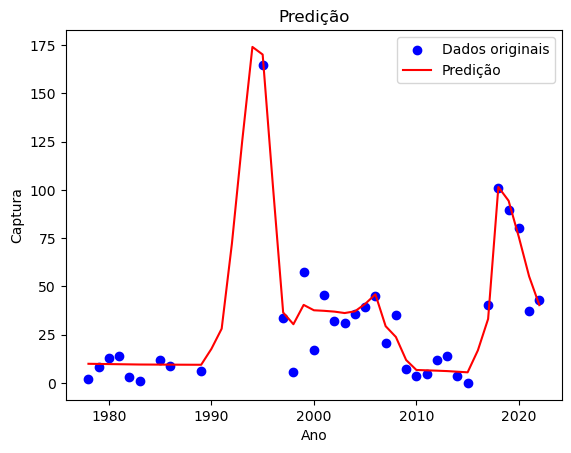

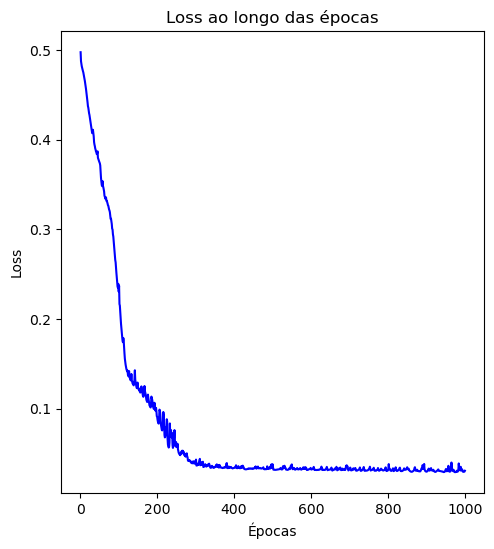

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])


history = model.fit(x_normalized, y_normalized, epochs= 1000, batch_size= 64, steps_per_epoch= 50, verbose=True)

x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predição para o ano 1969: 11.262033462524414
Predição para o ano 1970: 11.117874145507812
Predição para o ano 1971: 10.973697662353516
Predição para o ano 1972: 10.827262878417969
Predição para o ano 1973: 10.669097900390625
Predição para o ano 1974: 10.511035919189453
Predição para o ano 1975: 10.352876663208008
Predição para o ano 1976: 10.194744110107422
Predição para o ano 1977: 10.036630630493164
Predição para o ano 1990: 17.668136596679688
Predição para o ano 1991: 28.1050968170166
Predição para o ano 1992: 72.23731231689453
Predição para o ano 1993: 125.13169860839844
Predição para o ano 1994: 174.11785888671875
Predição para o ano 2016: 16.876789093017578


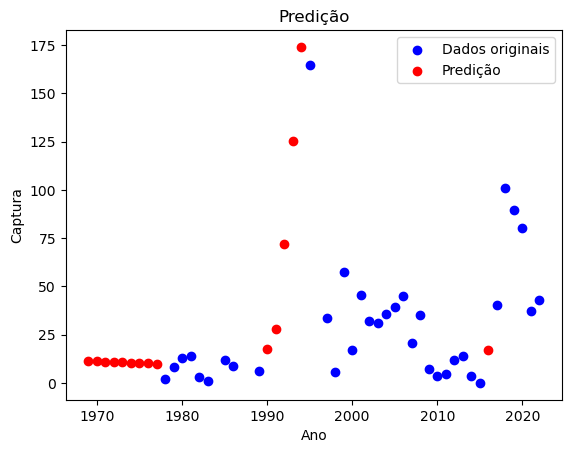

In [25]:
anos_para_prever = np.array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1990, 1991, 1992, 1993, 1994, 2016]).reshape(-1, 1)
anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std
predicoes_normalizadas = model.predict(anos_para_prever_normalizados)
predicoes = predicoes_normalizadas * y_std + y_mean


for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='outer').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.scatter(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição')
plt.legend()
plt.show()

In [26]:
df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Polvo_artesanal_reconstruido.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
35  1969.0               NaN         11.262033
36  1970.0               NaN         11.117874
37  1971.0               NaN         10.973698
38  1972.0               NaN         10.827263
39  1973.0               NaN         10.669098
40  1974.0               NaN         10.511036
41  1975.0               NaN         10.352877
42  1976.0               NaN         10.194744
43  1977.0               NaN         10.036631
0   1978.0          2.000000               NaN
1   1979.0          8.000000               NaN
2   1980.0         13.000000               NaN
3   1981.0         14.000000               NaN
4   1982.0          3.000000               NaN
5   1983.0          1.000000               NaN
6   1985.0         12.000000               NaN
7   1986.0          9.000000               NaN
8   1989.0          6.000000               NaN
44  1990.0               NaN         17.668137
45  1991.0               NaN         28.105097
46  1992.0   

POLVO INDUSTRIAL

In [13]:
x = np.array(df_x1['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(df_x1['Polvo_ind'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

c:\Users\dougl\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 456us/step - loss: 0.5093 - mse: 0.9987
Epoch 2/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 0.4998 - mse: 0.9800
Epoch 3/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 0.4908 - mse: 0.9624
Epoch 4/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 0.4827 - mse: 0.9464
Epoch 5/250


c:\Users\dougl\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.4730 - mse: 0.9275
Epoch 6/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.4622 - mse: 0.9062
Epoch 7/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.4508 - mse: 0.8838
Epoch 8/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 0.4387 - mse: 0.8603
Epoch 9/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.4260 - mse: 0.8352
Epoch 10/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 0.4123 - mse: 0.8084
Epoch 11/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 0.3979 - mse: 0.7802
Epoch 12/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.3832 - mse: 0.7514
Epoch 13/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 0.3683 - mse: 0.7221
Epoch 14/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.3538 - mse: 0.6937
Epoch 15/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.3401 - mse: 0.6668
Epoch 16/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.3266 - mse: 0.6404
Epoch 17/250
50/50 ━━

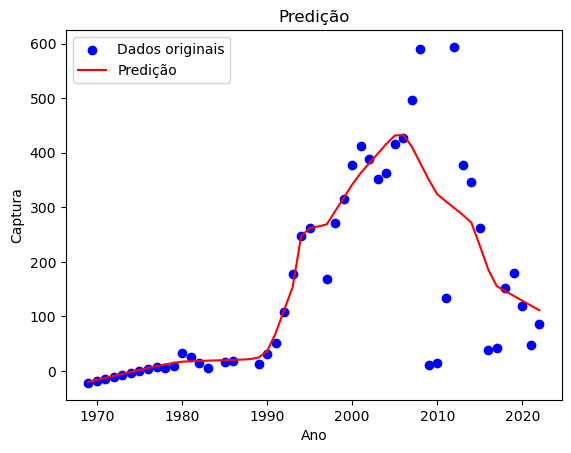

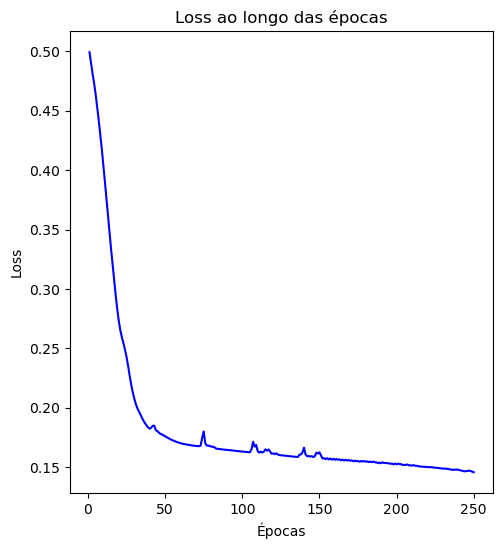

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])


history = model.fit(x_normalized, y_normalized, epochs= 250, batch_size= 64, steps_per_epoch= 50, verbose=True)

x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predição para o ano 1969: -33.15202331542969
Predição para o ano 1970: -29.359649658203125
Predição para o ano 1971: -25.567291259765625
Predição para o ano 1972: -21.77496337890625
Predição para o ano 1973: -17.982620239257812
Predição para o ano 1974: -14.156112670898438
Predição para o ano 1975: -10.223739624023438
Predição para o ano 1976: -6.0528106689453125
Predição para o ano 1977: -1.8829498291015625
Predição para o ano 1983: 11.069610595703125
Predição para o ano 1990: 13.615951538085938
Predição para o ano 1991: 23.288467407226562
Predição para o ano 1992: 35.05546569824219
Predição para o ano 1993: 52.156822204589844
Predição para o ano 1994: 73.412353515625
Predição para o ano 1995: 97.53436279296875


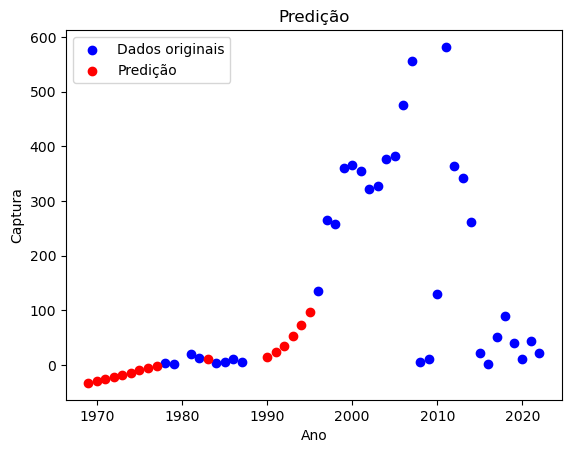

In [17]:
anos_para_prever = np.array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1983, 1990, 1991, 1992, 1993, 1994, 1995]).reshape(-1, 1)
anos_para_prever_normalizados = (anos_para_prever - x_mean) / x_std
predicoes_normalizadas = model.predict(anos_para_prever_normalizados)
predicoes = predicoes_normalizadas * y_std + y_mean


for ano, predicao in zip(anos_para_prever.flatten(), predicoes.flatten()):
    print(f"Predição para o ano {ano}: {predicao}")


df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='outer').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.scatter(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição')
plt.legend()
plt.show()

In [19]:
df_originais = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_preditos = pd.DataFrame({'Ano': anos_para_prever.flatten(), 'Captura Preditos': predicoes.flatten()})
df_combined = pd.merge(df_originais, df_preditos, on='Ano', how='outer').sort_values(by='Ano')
print(df_combined)
df_combined.to_excel('DataFrame_reconstruido/Polvo_industrial_reconstruido.xlsx', index=False)

       Ano  Captura Original  Captura Preditos
35  1969.0               NaN        -33.152023
36  1970.0               NaN        -29.359650
37  1971.0               NaN        -25.567291
38  1972.0               NaN        -21.774963
39  1973.0               NaN        -17.982620
40  1974.0               NaN        -14.156113
41  1975.0               NaN        -10.223740
42  1976.0               NaN         -6.052811
43  1977.0               NaN         -1.882950
0   1978.0          3.000000               NaN
1   1979.0          2.000000               NaN
2   1981.0         20.000000               NaN
3   1982.0         12.000000               NaN
44  1983.0               NaN         11.069611
4   1984.0          4.000000               NaN
5   1985.0          5.000000               NaN
6   1986.0         10.000000               NaN
7   1987.0          6.000000               NaN
45  1990.0               NaN         13.615952
46  1991.0               NaN         23.288467
47  1992.0   

POLVO TOTAL

In [27]:
df_1 = pd.read_excel('DataFrame_reconstruido\Polvo_artesanal_reconstruido.xlsx')

In [28]:
x0 = pd.DataFrame(df_1[['Ano', 'Captura Original']].fillna(0).values, columns=['Ano', 'Captura Original'])
x1 = pd.DataFrame(df_1[['Ano', 'Captura Preditos']].fillna(0).values, columns=['Ano', 'Captura Preditos'])

In [29]:
resultado = x0['Captura Original'] + x1['Captura Preditos']

novo_df1 = pd.DataFrame({'Ano': df_1['Ano'], 'Polvo_art': resultado})

print(novo_df1)

     Ano    Lula_art
0   1969   11.262033
1   1970   11.117874
2   1971   10.973698
3   1972   10.827263
4   1973   10.669098
5   1974   10.511036
6   1975   10.352877
7   1976   10.194744
8   1977   10.036631
9   1978    2.000000
10  1979    8.000000
11  1980   13.000000
12  1981   14.000000
13  1982    3.000000
14  1983    1.000000
15  1985   12.000000
16  1986    9.000000
17  1989    6.000000
18  1990   17.668137
19  1991   28.105097
20  1992   72.237312
21  1993  125.131699
22  1994  174.117859
23  1995  165.000000
24  1997   33.500000
25  1998    5.500000
26  1999   57.500000
27  2000   17.000000
28  2001   45.500000
29  2002   32.000000
30  2003   31.000000
31  2004   35.500000
32  2005   39.500000
33  2006   45.000000
34  2007   20.500000
35  2008   35.041000
36  2009    7.000000
37  2010    3.728000
38  2011    4.711000
39  2012   11.939000
40  2013   13.802000
41  2014    3.823000
42  2015    0.008000
43  2016   16.876789
44  2017   40.427551
45  2018  101.038300
46  2019   89

In [30]:
df_2 = pd.read_excel('DataFrame_reconstruido\Polvo_industrial_reconstruido.xlsx')

In [31]:
x2 = pd.DataFrame(df_2[['Ano', 'Captura Original']].fillna(0).values, columns=['Ano', 'Captura Original'])
x3 = pd.DataFrame(df_2[['Ano', 'Captura Preditos']].fillna(0).values, columns=['Ano', 'Captura Preditos'])

In [32]:
resultado_2 = x2['Captura Original'] + x3['Captura Preditos']

novo_df_2 = pd.DataFrame({'Ano': df_2['Ano'], 'Lula_ind': resultado_2})

print(novo_df_2)

     Ano    Lula_ind
0   1969  -33.152023
1   1970  -29.359650
2   1971  -25.567291
3   1972  -21.774963
4   1973  -17.982620
5   1974  -14.156113
6   1975  -10.223740
7   1976   -6.052811
8   1977   -1.882950
9   1978    3.000000
10  1979    2.000000
11  1981   20.000000
12  1982   12.000000
13  1983   11.069611
14  1984    4.000000
15  1985    5.000000
16  1986   10.000000
17  1987    6.000000
18  1990   13.615952
19  1991   23.288467
20  1992   35.055466
21  1993   52.156822
22  1994   73.412354
23  1995   97.534363
24  1996  135.000000
25  1997  265.000000
26  1998  258.500000
27  1999  359.500000
28  2000  366.500000
29  2001  355.500000
30  2002  321.000000
31  2003  327.500000
32  2004  376.000000
33  2005  381.500000
34  2006  476.000000
35  2007  555.500000
36  2008    4.284000
37  2009   10.863000
38  2010  128.988998
39  2011  581.804993
40  2012  363.782990
41  2013  341.524994
42  2014  261.919006
43  2015   22.264999
44  2016    0.944000
45  2017   51.736301
46  2018   89

In [33]:
resultado = x0['Captura Original'] + x1['Captura Preditos'] + x2['Captura Original'] + x3['Captura Preditos']

Polvo_total = pd.DataFrame({'Ano': df_1['Ano'], 'Polvo_total': resultado}).dropna()

print(Polvo_total)

       Ano  Polvo_total
0   1969.0   -21.889990
1   1970.0   -18.241776
2   1971.0   -14.593594
3   1972.0   -10.947701
4   1973.0    -7.313522
5   1974.0    -3.645077
6   1975.0     0.129137
7   1976.0     4.141933
8   1977.0     8.153681
9   1978.0     5.000000
10  1979.0    10.000000
11  1980.0    33.000000
12  1981.0    26.000000
13  1982.0    14.069611
14  1983.0     5.000000
15  1985.0    17.000000
16  1986.0    19.000000
17  1989.0    12.000000
18  1990.0    31.284088
19  1991.0    51.393564
20  1992.0   107.292778
21  1993.0   177.288521
22  1994.0   247.530212
23  1995.0   262.534363
24  1997.0   168.500000
25  1998.0   270.500000
26  1999.0   316.000000
27  2000.0   376.500000
28  2001.0   412.000000
29  2002.0   387.500000
30  2003.0   352.000000
31  2004.0   363.000000
32  2005.0   415.500000
33  2006.0   426.500000
34  2007.0   496.500000
35  2008.0   590.541000
36  2009.0    11.284000
37  2010.0    14.591000
38  2011.0   133.699998
39  2012.0   593.743993
40  2013.0   377

In [34]:
x = np.array(Polvo_total['Ano'], dtype=np.float32).reshape(-1, 1)
y = np.array(Polvo_total['Polvo_total'], dtype=np.float32).reshape(-1, 1)

x_mean = np.mean(x)
x_std = np.std(x)
x_normalized = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y_normalized = (y - y_mean) / y_std

Epoch 1/1000


c:\Users\dougl\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 421us/step - loss: 0.5241 - mse: 1.0276
Epoch 2/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 0.4795 - mse: 0.9402
Epoch 3/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 0.4594 - mse: 0.9008
Epoch 4/1000


c:\Users\dougl\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 0.4399 - mse: 0.8626
Epoch 5/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.4202 - mse: 0.8240
Epoch 6/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 0.3989 - mse: 0.7822
Epoch 7/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.3788 - mse: 0.7428
Epoch 8/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 0.3602 - mse: 0.7062
Epoch 9/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 0.3431 - mse: 0.6728
Epoch 10/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.3276 - mse: 0.6424
Epoch 11/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.3138 - mse: 0.6153
Epoch 12/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 0.3013 - mse: 0.5909
Epoch 13/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 0.2905 - mse: 0.5696
Epoch 14/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 0.2813 - mse: 0.5517
Epoch 15/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.2732 - mse: 0.5358
Epoch 16/10

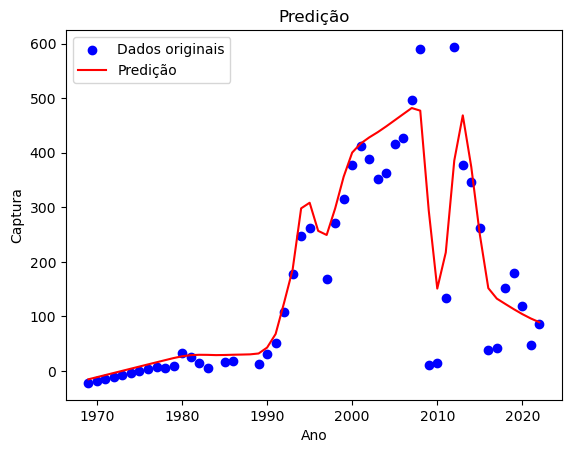

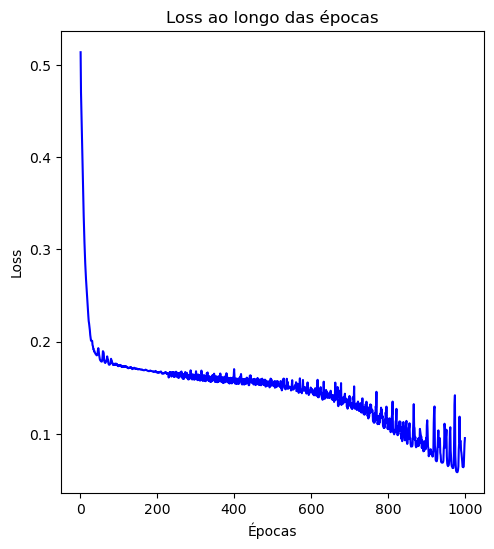

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='leaky_relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(1, activation='leaky_relu')
    
])

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])


history = model.fit(x_normalized, y_normalized, epochs= 1000, batch_size= 64, steps_per_epoch= 50, verbose=True)

x_all = np.arange(min(x.flatten()), max(x.flatten()) + 1).reshape(-1, 1)
x_all_normalized = (x_all - x_mean) / x_std
y_all_predicted_normalized = model.predict(x_all_normalized)
y_all_predicted = y_all_predicted_normalized * y_std + y_mean

df_predicted = pd.DataFrame({'Ano': x.flatten(), 'Captura Original': y.flatten()})
df_all_predicted = pd.DataFrame({'Ano': x_all.flatten(), 'Captura Preditos': y_all_predicted.flatten()})
df_combined = pd.merge(df_predicted, df_all_predicted, on='Ano', how='right').sort_values(by='Ano')

plt.scatter(df_combined['Ano'], df_combined['Captura Original'], color='blue', label='Dados originais')
plt.plot(df_combined['Ano'], df_combined['Captura Preditos'], color='red', label='Predição')
plt.xlabel('Ano')
plt.ylabel('Captura')
plt.title('Predição')
plt.legend()
plt.show()

loss_values = history.history['loss']
#accuracy_values = history.history['accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'b')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss ao longo das épocas')
plt.show()
